In [237]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
from skimage import img_as_float

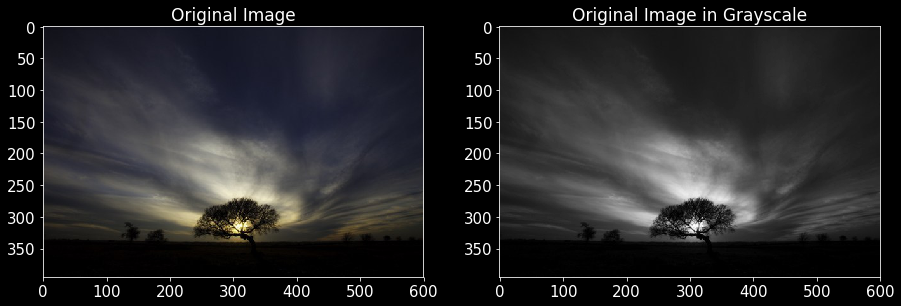

Imin:  0 Imax:  253


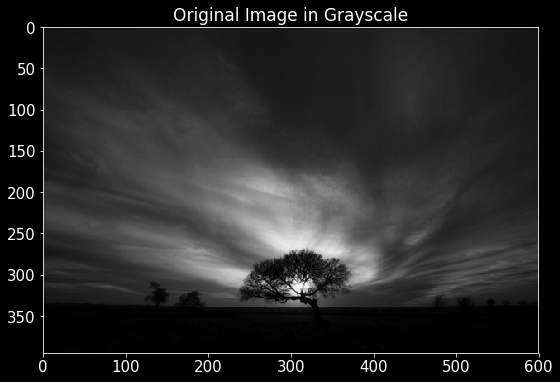

In [248]:
M = cv2.cvtColor(cv2.imread('tree.jpg'), cv2.COLOR_BGR2RGB)
M_gray = cv2.cvtColor(M, cv2.COLOR_RGB2GRAY)
plt.style.use('dark_background')
plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(M_gray,'gray')
plt.title('Original Image in Grayscale')
plt.show()
plt.figure(figsize=[15,6])
#plt.imshow(M_gray, cmap = 'gray')  
#plt.show()

Imin = np.amin(M_gray)
Imax = np.amax(M_gray)
print('Imin: ',Imin,'Imax: ',Imax)

plt.imshow(M_gray,'gray')
plt.title('Original Image in Grayscale')
plt.show()

# 1. Contrast Stretching

Imin:  0 Imax:  253
Iminf:  0.0 Imaxf:  0.9921568627450981


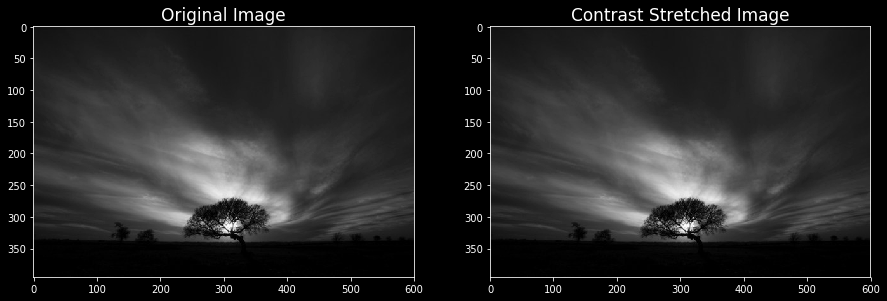

In [239]:
# from skimage : img_as_float , Normalizing float points
M_grayf = img_as_float(M_gray) 
M_contra = M_grayf*255 

Imin = np.amin(M_gray)
Imax = np.amax(M_gray)
Iminf = np.amin(M_grayf)
Imaxf = np.amax(M_grayf)

print('Imin: ',Imin,'Imax: ',Imax)
print('Iminf: ',Iminf,'Imaxf: ',Imaxf)
plt.style.use('dark_background')
plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(M_contra,'gray')
plt.title('Contrast Stretched Image')
plt.show()

# 2. Histogram Manipulation

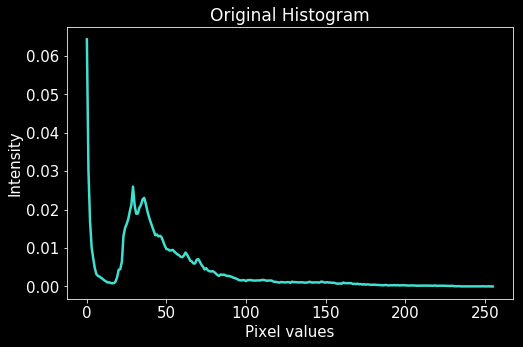

In [251]:
hist, bin_edges = np.histogram(M_gray, bins = np.linspace(0,255,257), density = "True")
#norm_hist = (hist-min(hist))/(max(hist)-min(hist))

plt.style.use('dark_background')

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(hist,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Original Histogram')
plt.show()

#plt.figure(figsize=[8,5])
#plt.rcParams['axes.titlesize'] = 17
#plt.rcParams.update({'font.size': 15})
#plt.plot(norm_hist,'turquoise',linewidth=2.5)
#plt.xlabel('Pixel values')
#plt.ylabel('Intensity')
#plt.title('Normalized Histogram')
#plt.show()

# 3. CDF

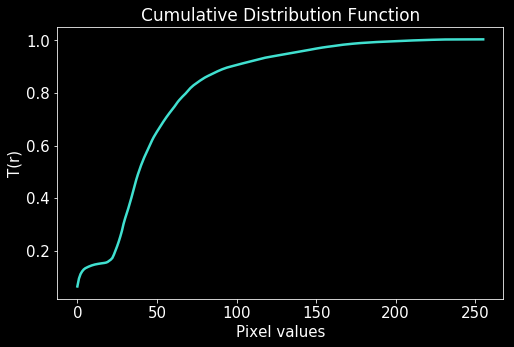

In [241]:
cdf = np.cumsum(hist)
#norm_cdf = (cdf-min(cdf))/(max(cdf)-min(cdf))

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(cdf,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('Cumulative Distribution Function')
plt.show()


# Desired CDFs

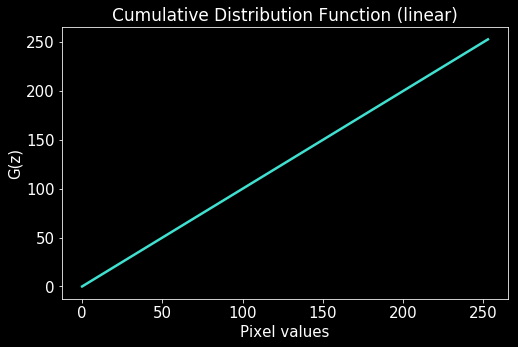

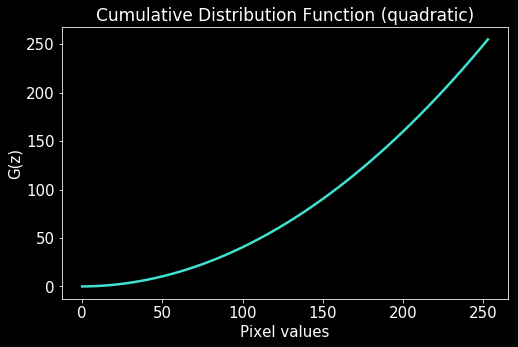

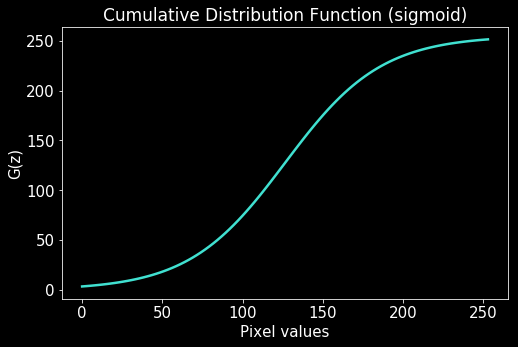

In [242]:
des_x = np.linspace(0,Imax,100)

#Quadratic 
def quad(x):
    x = x**2+2.8*x+0.5
    x_norm = ((x-np.min(x))/(np.max(x)-np.min(x)))*255
    return x_norm

# Sigmoid
def sig_fxn(x):
    a = np.median(x)
    m = 30
    return (1)/(1 + np.exp((-x+a)/m))*255

a = np.median(des_x)
m = 30

def inv_sig(y):
    return (-((np.log((1/y)-1))*m - a))


plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(des_x,des_x,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('G(z)')
plt.title('Cumulative Distribution Function (linear)')
plt.show()

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(des_x,quad(des_x),'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('G(z)')
plt.title('Cumulative Distribution Function (quadratic)')
plt.show()

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(des_x,sig_fxn(des_x),'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('G(z)')
plt.title('Cumulative Distribution Function (sigmoid)')
plt.show()



# Sigmoid CDF

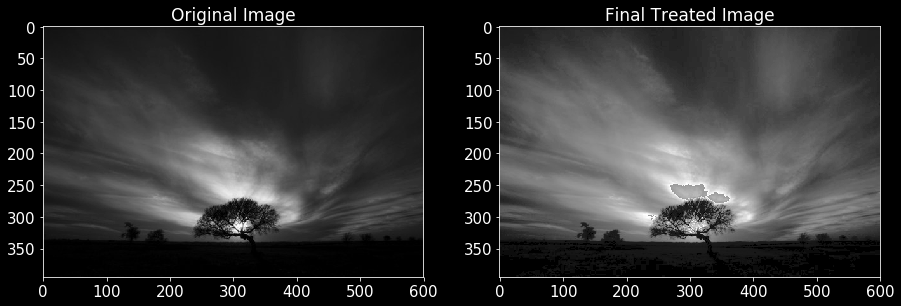

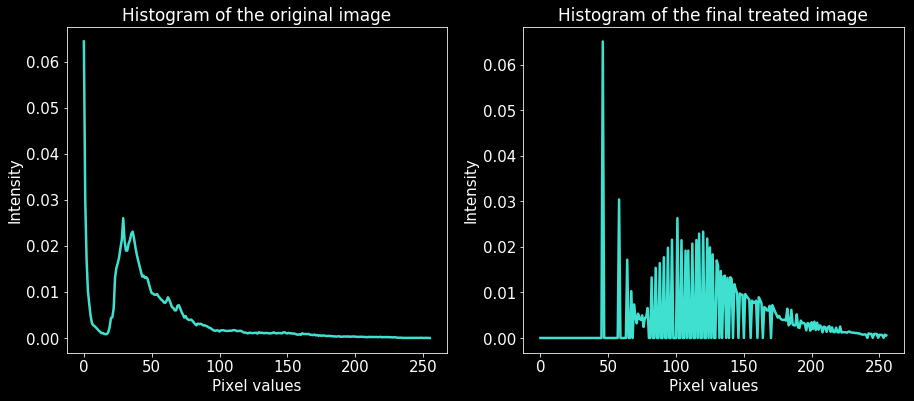

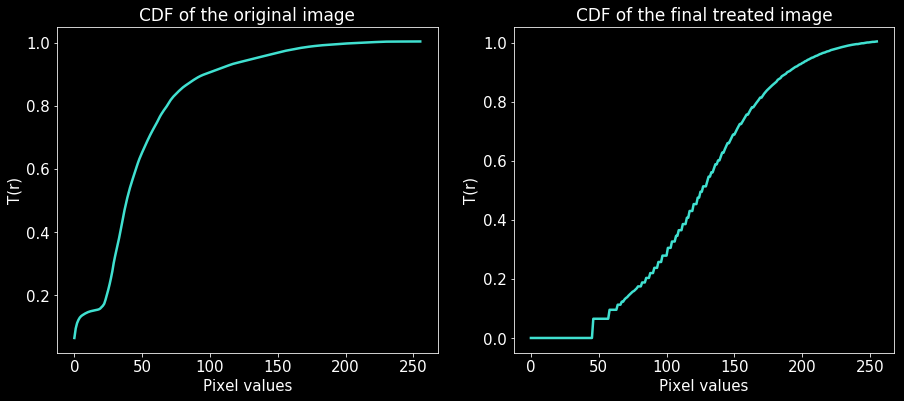

In [262]:
image_sig = np.floor(np.copy(M_gray))
floored = np.floor(M_gray)
for i in range(len(floored)):
    for j in range(len(floored[i])):
        before = int(floored[i][j])
        if before >= 200:
            continue
        percentile = cdf[before]
        desire = inv_sig(percentile)
        image_sig[i][j] = desire
        
final_sig = image_sig.astype(float)

hist1_s, bin_edges = np.histogram(final_sig, bins = np.linspace(0,255,257), density = "True")

cdf1 = np.cumsum(hist1_s)
#norm_cdf = (cdf-min(cdf))/(max(cdf)-min(cdf))


plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(final_sig,'gray')
plt.title('Final Treated Image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.subplot(121)
plt.plot(hist,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the original image')
plt.subplot(122)
plt.plot(hist1_s,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the final treated image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.subplot(121)
plt.plot(cdf,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('CDF of the original image')
plt.subplot(122)
plt.plot(cdf1,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('CDF of the final treated image')
plt.show()


# Linear CDF

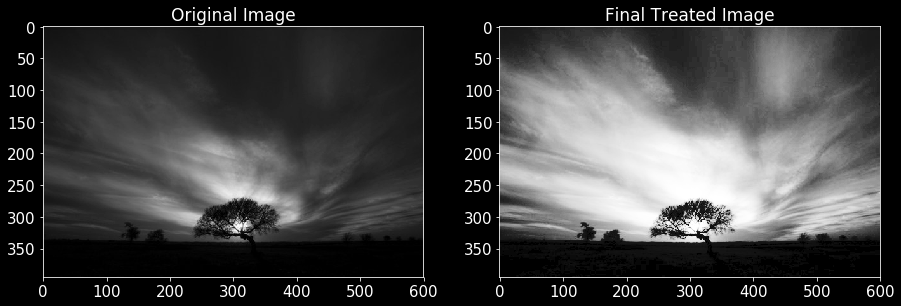

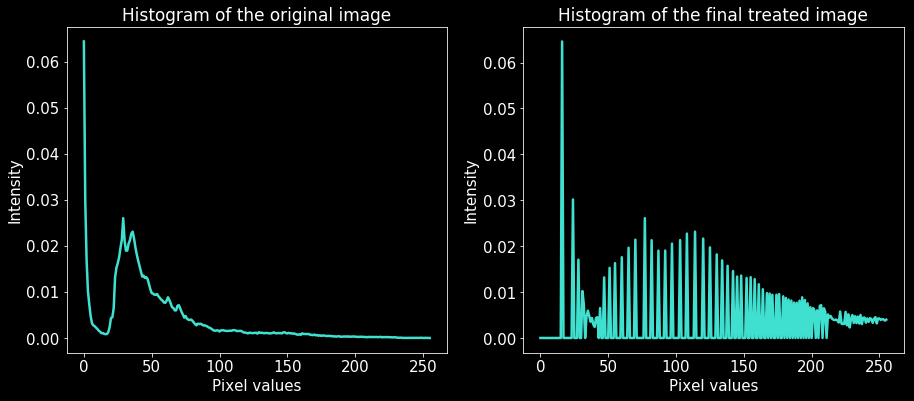

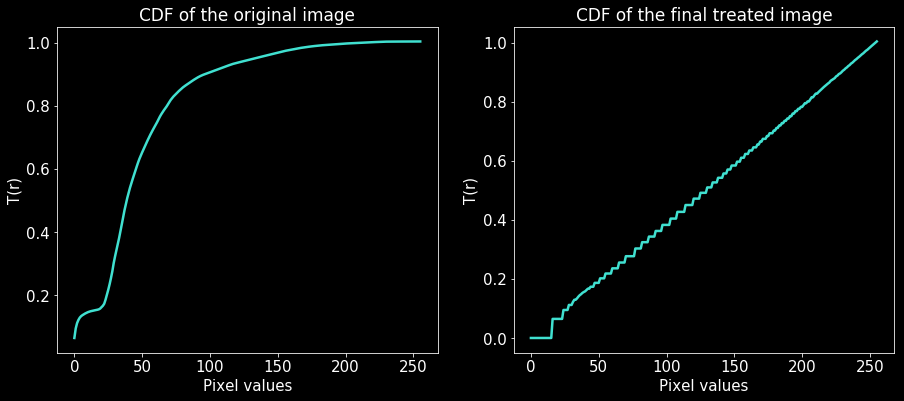

In [261]:
lin = np.floor(np.copy(M_gray))
flo = np.floor(M_gray)
for i in range(len(flo)):
    for j in range(len(flo[i])):
        z = int(flo[i][j])
        if z >= Imax:
            continue
        p= cdf[z]
        des = p*255
        lin[i][j] = des
        
final_lin = lin.astype(float)

hist1_l, bin_edges = np.histogram(final_lin, bins = np.linspace(0,255,257), density = "True")

cdf1 = np.cumsum(hist1_l)

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(final_lin,'gray')
plt.title('Final Treated Image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.subplot(121)
plt.plot(hist,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the original image')
plt.subplot(122)
plt.plot(hist1_l,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the final treated image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.subplot(121)
plt.plot(cdf,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('CDF of the original image')
plt.subplot(122)
plt.plot(cdf1,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('CDF of the final treated image')
plt.show()

# Quadratic CDF

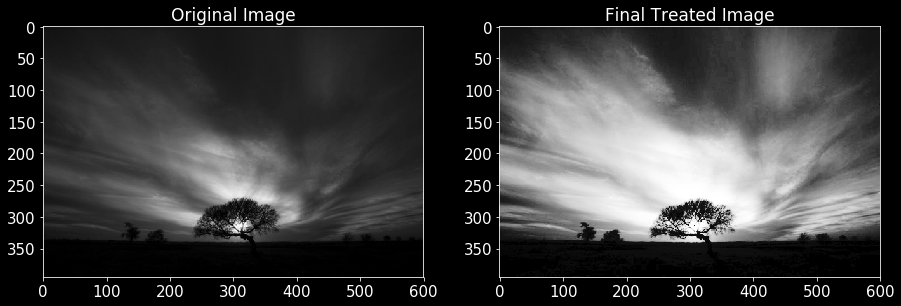

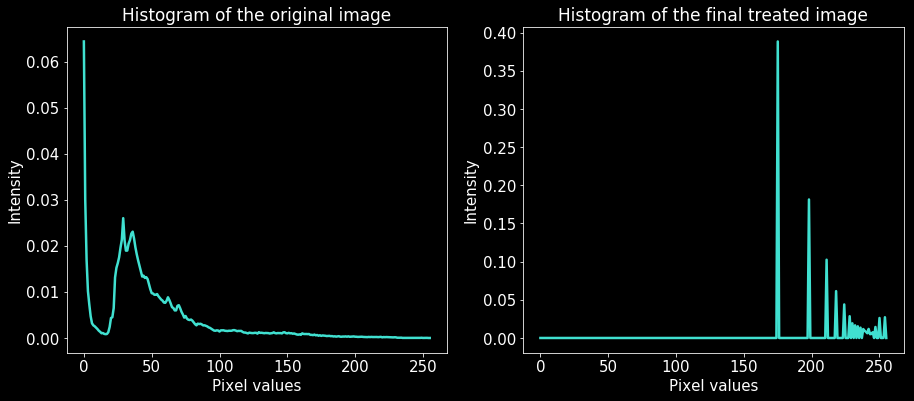

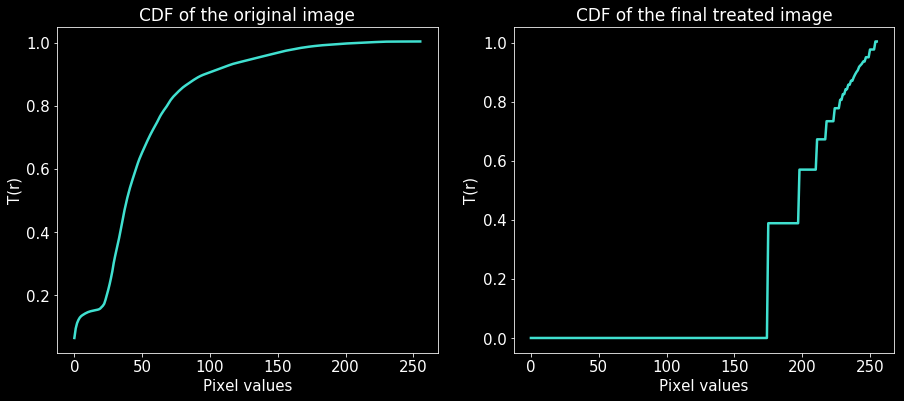

In [260]:
image_sig = np.floor(np.copy(M_gray))
floored = np.floor(M_gray)
for i in range(len(floored)):
    for j in range(len(floored[i])):
        before = int(floored[i][j])
        if before >= Imax:
            continue
        percentile = cdf[before]
        desire = 255*(percentile**2+2.8*percentile+0.5)
        image_sig[i][j] = desire
        
final_quad = image_sig.astype(float)

hist1_q, bin_edges = np.histogram(final_quad, bins = np.linspace(0,255,257), density = "True")

cdf1 = np.cumsum(hist1_q)

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(final_quad,'gray')
plt.title('Final Treated Image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.subplot(121)
plt.plot(hist,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the original image')
plt.subplot(122)
plt.plot(hist1_q,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the final treated image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.subplot(121)
plt.plot(cdf,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('CDF of the original image')
plt.subplot(122)
plt.plot(cdf1,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('CDF of the final treated image')
plt.show()


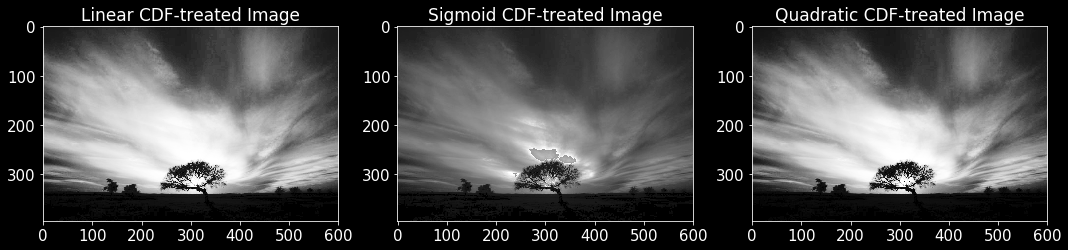

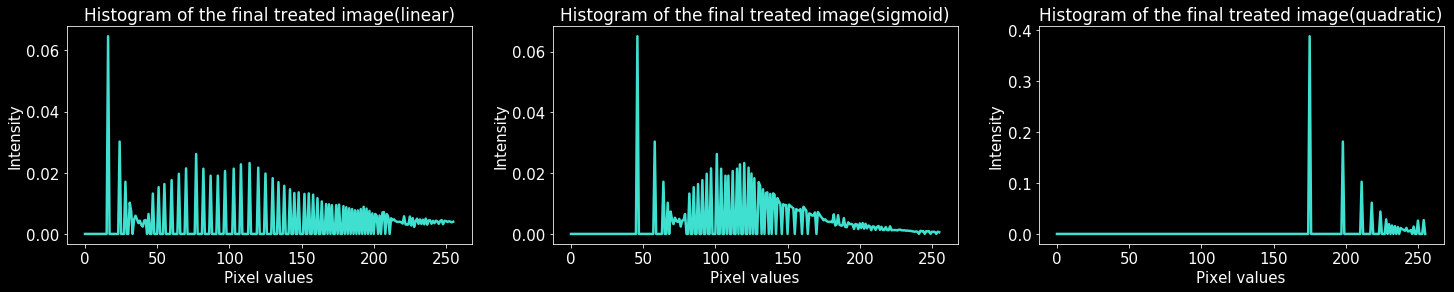

In [276]:
plt.figure(figsize=[18,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(131)
plt.imshow(final_lin,'gray')
plt.title('Linear CDF-treated Image')
plt.subplot(132)
plt.imshow(final_sig,'gray')
plt.title('Sigmoid CDF-treated Image')
plt.subplot(133)
plt.imshow(final_quad,'gray')
plt.title('Quadratic CDF-treated Image')
plt.show()

plt.figure(figsize=[15,4])
plt.rcParams['axes.titlesize'] = 17
plt.subplots_adjust(left=None, bottom=None, right=1.4, top=None, wspace=None, hspace=None)
plt.subplot(131)
plt.plot(hist1_l,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the final treated image(linear)')
plt.subplot(132)
plt.plot(hist1_s,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the final treated image(sigmoid)')
plt.subplot(133)
plt.plot(hist1_q,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the final treated image(quadratic)')
plt.show()
